In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Folders and Files

In [2]:
estimates_exp = True
bit_stream = not estimates_exp

In [3]:
experiments_folder = ('./experiments' 
                      + '/750_FPS_mul8_scale_fixed'
                      + '/02_estimates_mvau_rtl_hls')

# experiments_folder = ('../my_mblnet_resnet_to_finn_driver/experiments/750_FPS'
#                       + '/02_full_build_vvau_lut_hls_mvau_hls')

if estimates_exp == False:
    experiments_folder += '/output_full_build'
else:
    experiments_folder += '/output_estimates_only'

estimates_folder = experiments_folder + '/report'

final_hw_config_file = experiments_folder + '/final_hw_config.json'
layer_resources_file = estimates_folder + '/estimate_layer_resources.json'
layer_alternatives_file = estimates_folder + '/estimate_layer_config_alternatives.json'
auto_folding_file = experiments_folder + '/auto_folding_config.json'

bit_stream_config_file = estimates_folder + '/post_synth_resources.json'    

# JSON to Dict

In [4]:
if estimates_exp == False:
    with open(final_hw_config_file, 'r') as hw_json_file:
        hw_config = json.load(hw_json_file)

with open(layer_resources_file, 'r') as layer_json_file:
    layer_config = json.load(layer_json_file)

with open(layer_alternatives_file, 'r') as alternatives_json_file:
    alternatives_config = json.load(alternatives_json_file)

with open(auto_folding_file, 'r') as auto_folding_json_file:
    auto_folding_config = json.load(auto_folding_json_file)

In [5]:
if bit_stream == True:
    with open(bit_stream_config_file, 'r') as bit_stream_json_file:
        bit_stream_config = json.load(bit_stream_json_file)

# FIFO Depth

In [6]:
if estimates_exp == False:
    fifo_depth = {}
    for k in hw_config.keys():
        if k == "Defaults":
            continue
        elif "FIFO" in k:
            fifo_depth.update({k: hw_config[k]["depth"]})  
    print(f'Number of FIFOs inserted in the model: {len(fifo_depth)}')

In [7]:
if estimates_exp == False:
    fig, ax = plt.subplots(figsize=(10,3))
    
    # plt.axhline(y=16384, color='r', linestyle='--')
    #plt.axhline(y=32768, color='r', linestyle='--')
    plt.axhline(y=16384/2, color='r', linestyle='--')
    ax.bar(list(fifo_depth.keys()), list(fifo_depth.values()))
    ax.set_xticks(list(fifo_depth.keys()))
    ax.set_xticklabels(list(fifo_depth.keys()), rotation=90, fontsize=8)
    ax.set_title("FIFO Depth")
    
    plt.show()

# Estimate Resources

In [8]:
# BRAM

bram_res = {}

for k in layer_config.keys():
    bram_res.update({k: layer_config[k]["BRAM_18K"]})

# Plot BRAM resources used

Total #BRAM used: 77.0


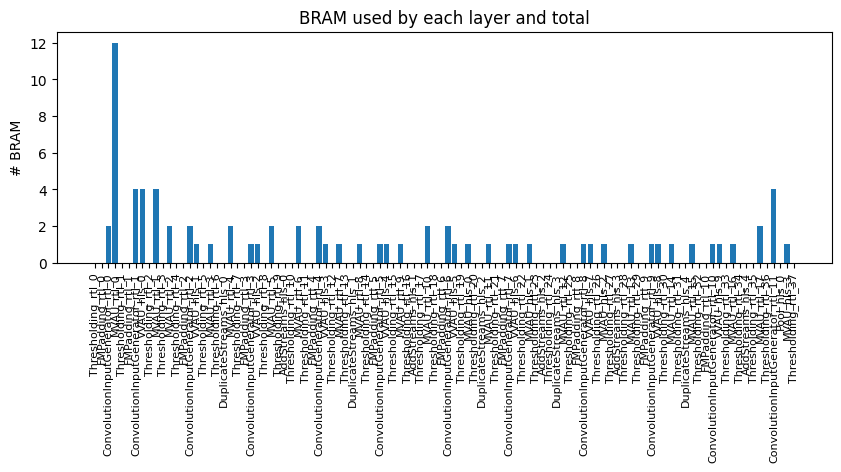

In [9]:
print(f'Total #BRAM used: {bram_res["total"]}')

fig, ax = plt.subplots(figsize=(10,3))

layers_name = list(bram_res.keys())[:-1]
counts = list(bram_res.values())[:-1]

ax.bar(layers_name, counts)

ax.set_ylabel('# BRAM')
ax.set_title('BRAM used by each layer and total')
ax.set_xticks(np.arange(len(layers_name)), layers_name, rotation=90, fontsize=8)

plt.show()

# Alternative Resources

In [10]:
bram_0 = {}
lut_0 = {}
dsp_0 = {}

bram_1 = {}
lut_1 = {}
dsp_1 = {}

bram_list = [bram_0, bram_1]
lut_list = [lut_0, lut_1]
dsp_list = [dsp_0, dsp_1]

In [11]:
for k in alternatives_config.keys():
    # if ("Thresholding" in k) or ("Pool" in k):
    #     continue
    if "Pool" in k:
        continue
    elif "Thresholding" in k:
        # Only 1 alternative for thresholding layers
        for i in range(1):
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
    elif "Convolution" in k:
        # Only 2 alternatives (0 and 1), as there are no URAM in PYNQ-Z1
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})
    elif "MVAU" in k:
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})
    elif "VVAU" in k:
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})

In [12]:
dsp_list[1]

{'ConvolutionInputGenerator_rtl_0': 0,
 'MVAU_rtl_0': 27,
 'ConvolutionInputGenerator_rtl_1': 0,
 'VVAU_hls_0': 0,
 'MVAU_rtl_1': 32,
 'MVAU_rtl_2': 8,
 'ConvolutionInputGenerator_rtl_2': 0,
 'VVAU_hls_1': 0,
 'MVAU_rtl_3': 8,
 'MVAU_rtl_4': 16,
 'ConvolutionInputGenerator_rtl_3': 0,
 'VVAU_hls_2': 0,
 'MVAU_rtl_5': 16,
 'MVAU_rtl_6': 16,
 'ConvolutionInputGenerator_rtl_4': 0,
 'VVAU_hls_3': 0,
 'MVAU_rtl_7': 8,
 'MVAU_rtl_8': 6,
 'ConvolutionInputGenerator_rtl_5': 0,
 'VVAU_hls_4': 0,
 'MVAU_rtl_9': 8,
 'MVAU_rtl_10': 12,
 'ConvolutionInputGenerator_rtl_6': 0,
 'VVAU_hls_5': 0,
 'MVAU_hls_0': 0,
 'MVAU_rtl_11': 8,
 'ConvolutionInputGenerator_rtl_7': 0,
 'VVAU_hls_6': 0,
 'MVAU_hls_1': 0,
 'MVAU_rtl_12': 4,
 'ConvolutionInputGenerator_rtl_8': 0,
 'VVAU_hls_7': 0,
 'MVAU_hls_2': 0,
 'MVAU_rtl_13': 4,
 'ConvolutionInputGenerator_rtl_9': 0,
 'VVAU_hls_8': 0,
 'MVAU_rtl_14': 4,
 'MVAU_rtl_15': 4,
 'ConvolutionInputGenerator_rtl_10': 0,
 'VVAU_hls_9': 0,
 'MVAU_rtl_16': 3,
 'MVAU_rtl_17': 5

In [13]:
conv_lut = {
    "LUT_wBRAM": {k: v for k, v in lut_list[0].items() if "Convolution" in k}, 
    "LUT_woBRAM": {k: v for k, v in lut_list[1].items() if "Convolution" in k},
}

mvau_lut = {
    "LUT_wDSP": {k: v for k, v in lut_list[0].items() if (("MVAU" in k) or ("VVAU" in k)) }, 
    "LUT_woDSP": {k: v for k, v in lut_list[1].items() if (("MVAU" in k) or ("VVAU" in k))},
}

mvau_dsp = {
    "wDSP": {k: v for k, v in dsp_list[0].items() if (("MVAU" in k) or ("VVAU" in k))}, 
    "woDSP": {k: v for k, v in dsp_list[1].items() if (("MVAU" in k) or ("VVAU" in k))},
}

thres_lut = {k: v for k, v in lut_list[0].items() if "Thresholding" in k}

In [14]:
mvau_lut

{'LUT_wDSP': {'MVAU_rtl_0': 0,
  'VVAU_hls_0': 933,
  'MVAU_rtl_1': 0,
  'MVAU_rtl_2': 0,
  'VVAU_hls_1': 383,
  'MVAU_rtl_3': 0,
  'MVAU_rtl_4': 0,
  'VVAU_hls_2': 458,
  'MVAU_rtl_5': 0,
  'MVAU_rtl_6': 0,
  'VVAU_hls_3': 341,
  'MVAU_rtl_7': 0,
  'MVAU_rtl_8': 0,
  'VVAU_hls_4': 379,
  'MVAU_rtl_9': 0,
  'MVAU_rtl_10': 0,
  'VVAU_hls_5': 341,
  'MVAU_hls_0': 375,
  'MVAU_rtl_11': 0,
  'VVAU_hls_6': 341,
  'MVAU_hls_1': 411,
  'MVAU_rtl_12': 0,
  'VVAU_hls_7': 341,
  'MVAU_hls_2': 375,
  'MVAU_rtl_13': 0,
  'VVAU_hls_8': 320,
  'MVAU_rtl_14': 0,
  'MVAU_rtl_15': 0,
  'VVAU_hls_9': 320,
  'MVAU_rtl_16': 0,
  'MVAU_rtl_17': 0,
  'MVAU_hls_3': 340},
 'LUT_woDSP': {'MVAU_rtl_0': 0,
  'VVAU_hls_0': 1778,
  'MVAU_rtl_1': 0,
  'MVAU_rtl_2': 0,
  'VVAU_hls_1': 489,
  'MVAU_rtl_3': 0,
  'MVAU_rtl_4': 0,
  'VVAU_hls_2': 669,
  'MVAU_rtl_5': 0,
  'MVAU_rtl_6': 0,
  'VVAU_hls_3': 394,
  'MVAU_rtl_7': 0,
  'MVAU_rtl_8': 0,
  'VVAU_hls_4': 484,
  'MVAU_rtl_9': 0,
  'MVAU_rtl_10': 0,
  'VVAU_hls_5'

# Thresholding Layers

Total number of LUT in Thresholding layers: 4952


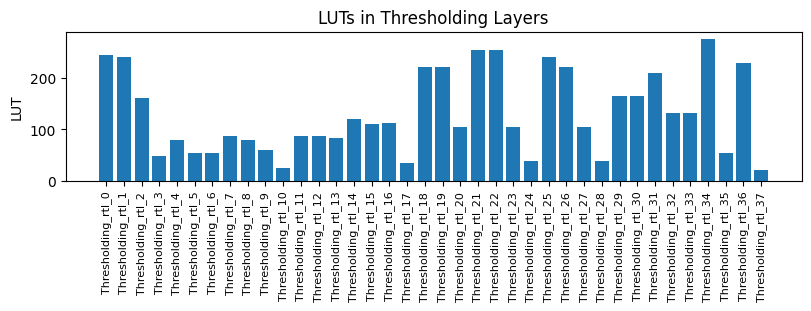

In [15]:
total_thres_lut = int(sum(thres_lut.values()))
print(f'Total number of LUT in Thresholding layers: {total_thres_lut}')

x = np.arange(len(thres_lut.keys()))  # the label locations

fig, ax = plt.subplots(layout='constrained', figsize=(8, 3))

ax.bar(thres_lut.keys(), thres_lut.values())
ax.set_ylabel('LUT')
ax.set_xticks(x, thres_lut.keys(), rotation=90, fontsize = 8)
ax.set_title("LUTs in Thresholding Layers")
plt.show()

# Define Names and values to plot

### Layers Name to plot

In [16]:
conv_layers = [k for k in alternatives_config.keys() if "Convolution" in k]
mvau_layers = [k for k in alternatives_config.keys() if (("MVAU" in k) or ("VVAU" in k))]

### Layers Values to plot

In [17]:
conv_lut_opt = {
    "wBRAM": list(conv_lut["LUT_wBRAM"].values()),
    "woBRAM": list(conv_lut["LUT_woBRAM"].values()),
}

mvau_lut_opt = {
    "wDSP": list(mvau_lut["LUT_wDSP"].values()),
    "woDSP": list(mvau_lut["LUT_woDSP"].values()),
}

mvau_dsp_opt = {
    "wDSP": list(mvau_dsp["wDSP"].values()),
    "woDSP": list(mvau_dsp["woDSP"].values()),
}

# Convolution Input Generator: LUTs with and withput BRAM

Total number of LUT used woDSP: 3600


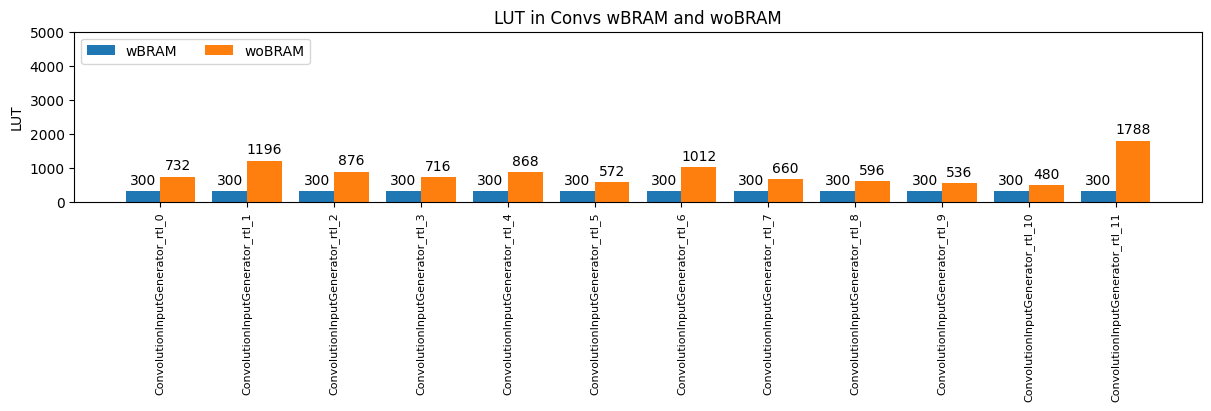

In [18]:
total_convgen_lut = np.array(conv_lut_opt["wBRAM"]).sum()
print(f'Total number of LUT used woDSP: {total_convgen_lut}')

x = np.arange(len(conv_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in conv_lut_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('LUT')
ax.set_title('LUT in Convs wBRAM and woBRAM')
ax.set_xticks(x + width/2, conv_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 5000)

plt.show()

# DSP: LUT in MVAU HLS with and without DSP

Total number of DSP used: 262
Total number of LUT used woDSP: 7649


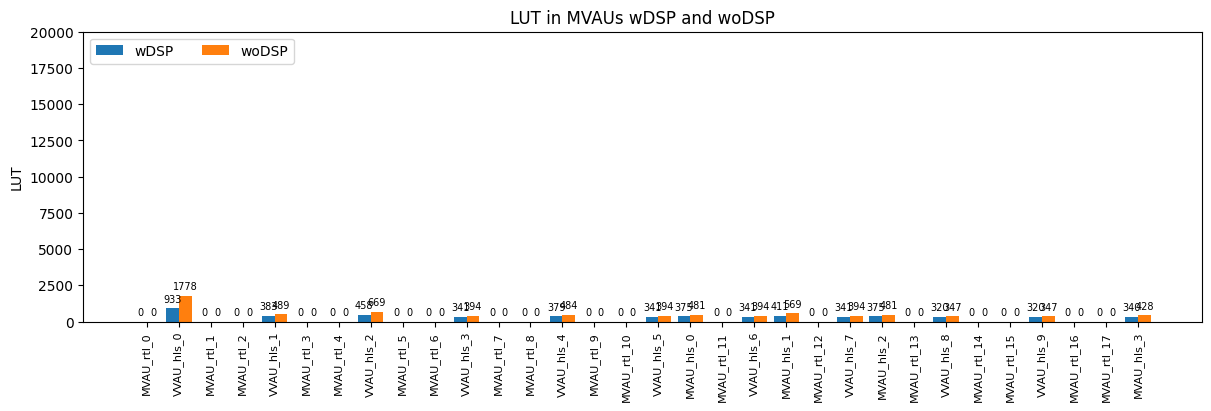

In [19]:
print(f'Total number of DSP used: {np.array(list(dsp_list[0].values())).sum()}')
total_mvau_lut = np.array(list(mvau_lut["LUT_woDSP"].values())).sum()
print(f'Total number of LUT used woDSP: {total_mvau_lut}')

x = np.arange(len(mvau_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in mvau_lut_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize = 7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('LUT')
ax.set_title('LUT in MVAUs wDSP and woDSP')
ax.set_xticks(x + width/2, mvau_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20000)

plt.show()

# DSP used in alternatives

If first MVAU is RTL, it usually underestimate DSP usage. Real one is $estimated \times 2$.

It is likely due to the fact that input is 8 bit and weights 4 bits -> DSP optimization is only $\times 2$.

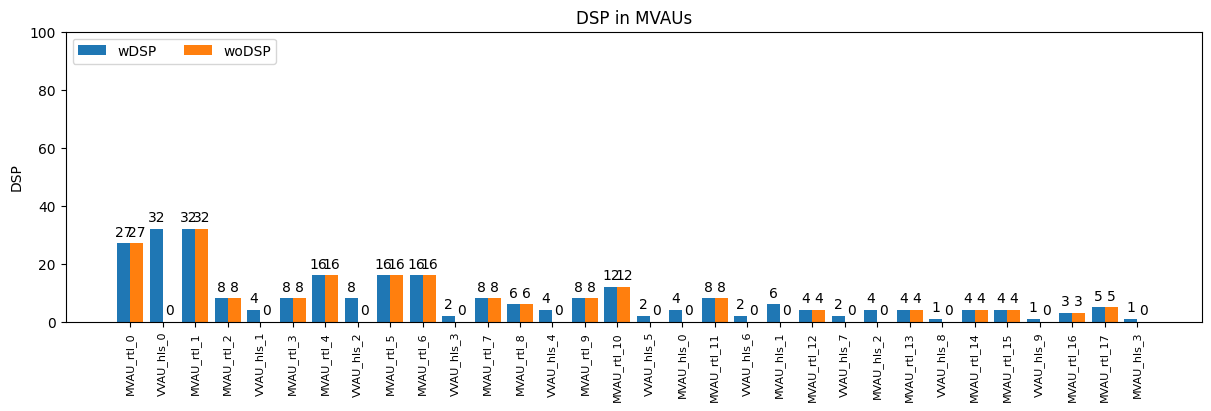

In [20]:
x = np.arange(len(mvau_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in mvau_dsp_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('DSP')
ax.set_title('DSP in MVAUs')
ax.set_xticks(x + width/2, mvau_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

In [21]:
print(mvau_dsp_opt)
print(f'Total DSP alternative config 1: {np.array(mvau_dsp_opt["wDSP"]).sum()}')
print(f'Total DSP alternative config 2: {np.array(mvau_dsp_opt["woDSP"]).sum()}')

{'wDSP': [27, 32, 32, 8, 4, 8, 16, 8, 16, 16, 2, 8, 6, 4, 8, 12, 2, 4, 8, 2, 6, 4, 2, 4, 4, 1, 4, 4, 1, 3, 5, 1], 'woDSP': [27, 0, 32, 8, 0, 8, 16, 0, 16, 16, 0, 8, 6, 0, 8, 12, 0, 0, 8, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 3, 5, 0]}
Total DSP alternative config 1: 262
Total DSP alternative config 2: 189


# Total LUT estimated

In [22]:
total_lut_estimated = total_thres_lut + total_convgen_lut + total_mvau_lut
print(f'{"Total Thresholding LUT estimated:":<35}' + str(total_thres_lut).rjust(6))
print(f'{"Total ConvInpGen LUT estimated:":<35}' + str(total_convgen_lut).rjust(6))
print(f'{"Total MVAU LUT estimated:":<35}' + str(total_mvau_lut).rjust(6))
print("------------------------------------------")
print(f'{"Total LUT estimated:":<35}' + str(total_lut_estimated).rjust(6))

Total Thresholding LUT estimated:    4952
Total ConvInpGen LUT estimated:      3600
Total MVAU LUT estimated:            7649
------------------------------------------
Total LUT estimated:                16201


# Auto Folding

For ideal use of DSP, PE % 4 == 0

In [23]:
wrong_PE = {}
good_PE = {}

for layer in auto_folding_config.keys():
    if "MVAU_rtl" in layer:
        layer_PE = auto_folding_config[layer]["PE"]
        if layer_PE % 4 != 0:
            wrong_PE[layer] =  layer_PE
        else:
            good_PE[layer] =  layer_PE        

print("Wrong PE")
for k, v in wrong_PE.items():
    print(k, v)
print("\nGood PE")
for k, v in good_PE.items():
    print(k, v)

Wrong PE
MVAU_rtl_1 1
MVAU_rtl_2 2
MVAU_rtl_3 1
MVAU_rtl_4 1
MVAU_rtl_5 1
MVAU_rtl_6 1
MVAU_rtl_7 1
MVAU_rtl_8 1
MVAU_rtl_9 1
MVAU_rtl_10 1
MVAU_rtl_11 1
MVAU_rtl_12 1
MVAU_rtl_13 1
MVAU_rtl_14 1
MVAU_rtl_15 1
MVAU_rtl_16 1
MVAU_rtl_17 1

Good PE
MVAU_rtl_0 4


# Bit Stream Resources after Synthesis

In [24]:
if bit_stream:
    dsp_bit_stream = {}
        
    for layer in bit_stream_config.keys():
        dsp_bit_stream[layer] = bit_stream_config[layer]["DSP"] 
    
    total_dsp = 0
    for k, v in dsp_bit_stream.items():
        if v != 0 and k != "(top)":
            total_dsp += v
            print(k, v)
    
    print(f'Total dsp used = {total_dsp}')
else:
    print("No bit stream in experiment")

No bit stream in experiment
